## Acquisition Analytics : Bank Marketing

We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build multiple supervised learning models, choose the best among them and analyze the financial benefits of the analytics project.

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

The objective is to reduce the customer acquisition cost by targeting the ones who are likely to buy and to improve the response rate, i.e. the fraction of prospects who respond to the campaign.

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [250]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

We can note that the dataset has 41188 data entries across 21 columns, one of them being the response (Target variable). Another thing to note is that there are no null values. That is, the dataset is completely clean.

In [251]:
# let's look at the first few rows of the dataframe
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [252]:
loan['Prospect ID'] = loan.index

In [253]:
# Looking at all the column names
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'Prospect ID'],
      dtype='object')

In [254]:
loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

As we note that the response variable has 'yes' and 'no' responses, we will convert it to 1 and 0 respectively

In [255]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [256]:
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [257]:
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [258]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

In [12]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(loan['response'].sum()/loan['response'].count()).round(4)

11.27

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

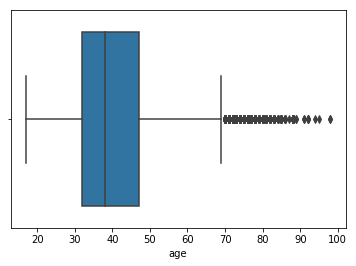

In [13]:
sns.boxplot(x='age', data=loan)
plt.show()

In [14]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

loan['age'][loan['age']>71] =71

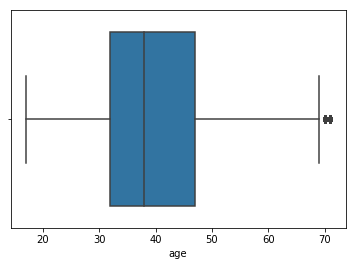

In [15]:
sns.boxplot(x='age', data=loan)
plt.show()

In [16]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [17]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')

In [18]:
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

In [19]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [20]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [21]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


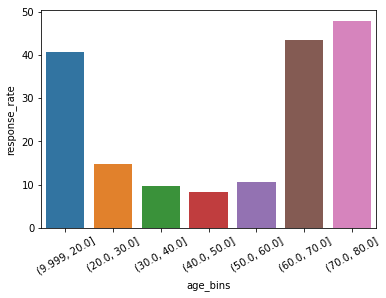

In [22]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [23]:
# Note that we have added a new column named age bucket to the table

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,Prospect ID,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [24]:
loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [25]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')

In [26]:
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

In [27]:
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')

In [28]:
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [29]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


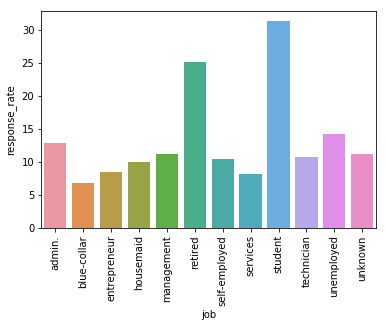

In [30]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### Marital

In [31]:
loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [32]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [33]:
count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')

In [34]:
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

In [35]:
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')

In [36]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [37]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


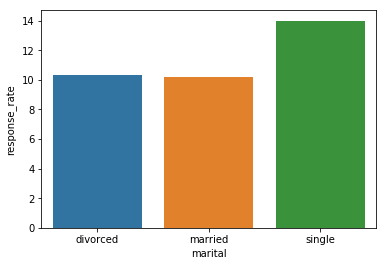

In [38]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### Education

In [39]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [40]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [41]:
loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [42]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')

In [43]:
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

In [44]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')

In [45]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [46]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


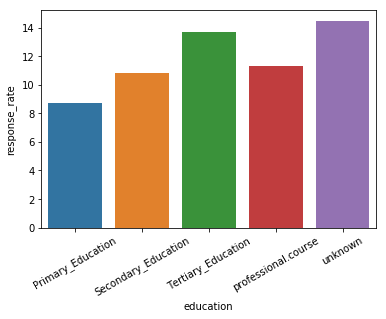

In [47]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### Previous Default

In [48]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [49]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')

In [50]:
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

In [51]:
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')

In [52]:
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [53]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


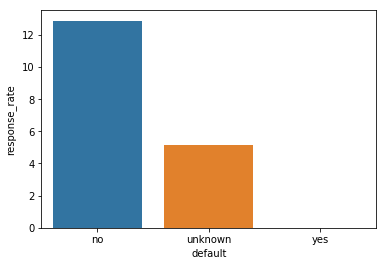

In [54]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Housing

In [55]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [56]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')

In [57]:
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

In [58]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')

In [59]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [60]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


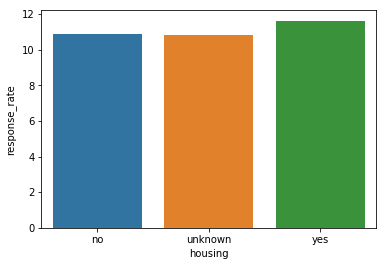

In [61]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### Loan

In [62]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [63]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')

In [64]:
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

In [65]:
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')

In [66]:
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)

In [67]:
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


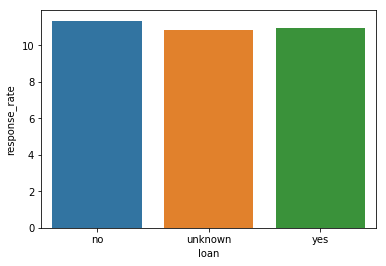

In [68]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

Now that we have had a look at the client data, we will move to the last contact information.

There are four features in the given dataset which cover this information. (Refer to the data dictionary for the same)

- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week
- Duration: last contact duration, in seconds 

Please note that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Contact

In [69]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [70]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')

In [71]:
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

In [72]:
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')

In [73]:
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [74]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


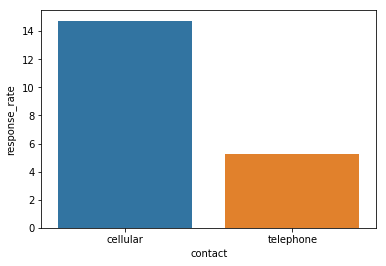

In [75]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### Month

In [76]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [77]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

In [78]:
No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

In [79]:
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

In [80]:
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [81]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


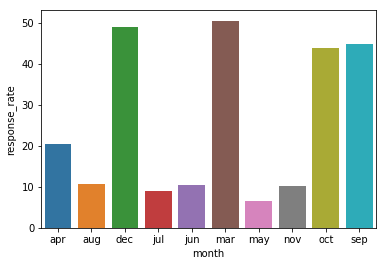

In [82]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [83]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [84]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

In [85]:
No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

In [86]:
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

In [87]:
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [88]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


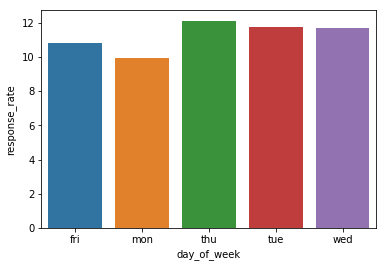

In [89]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

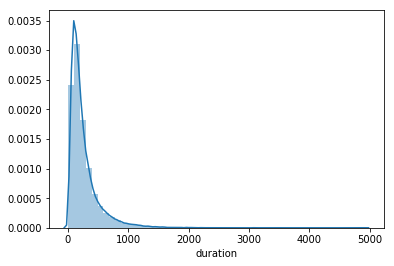

In [90]:
sns.distplot(loan['duration'])
plt.show()

As we know that this is a continuos variable, we will create a box plot

In [91]:
loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

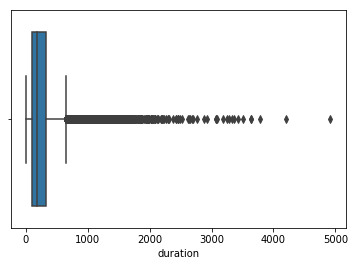

In [92]:
sns.boxplot(x='duration', data=loan)
plt.show()

Since less than one percent of entires have duration greater than 1271, we can assume all entries with duration greater than 1271 as having duration as 1271.

In [93]:
loan['duration'][loan['duration']>1271] =1271

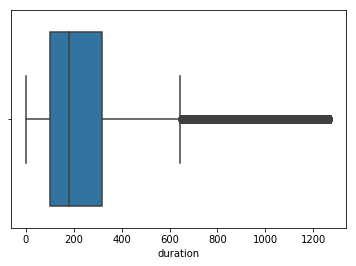

In [94]:
sns.boxplot(x='duration', data=loan)
plt.show()

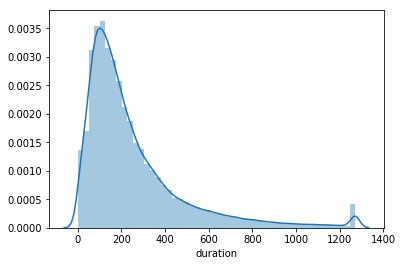

In [95]:
sns.distplot(loan['duration'])
plt.show()

Now that we have looked at client data and the data related to last contact, we will look at some of the other attributes.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

In [96]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

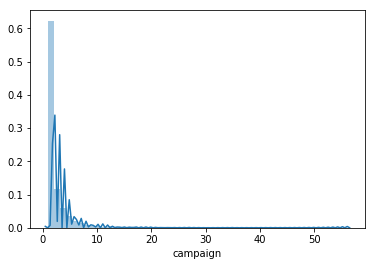

In [97]:
sns.distplot(loan['campaign'])
plt.show()

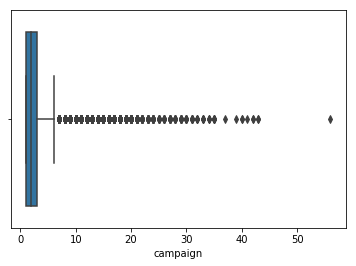

In [98]:
# We will create a box plot

sns.boxplot(x='campaign', data=loan)
plt.show()

In [99]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merga all data entries with contacts greater than 14 as having campaign contact as 14

In [100]:
loan['campaign'][loan['campaign']>14] =14

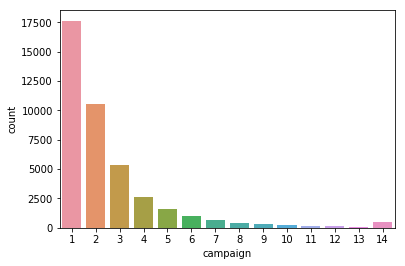

In [101]:
sns.countplot(loan['campaign'])
plt.show()

In [102]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

In [103]:
No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

In [104]:
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

In [105]:
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [106]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


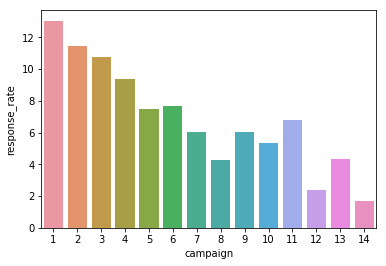

In [107]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [108]:
loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [109]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [110]:
loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [111]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

In [112]:
No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

In [113]:
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

In [114]:
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [115]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


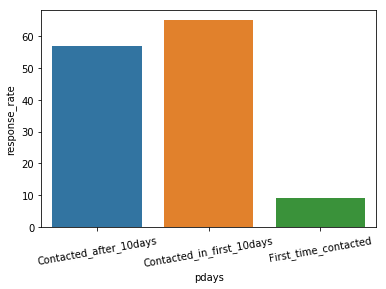

In [116]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [117]:
loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [118]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [119]:
loan['previous'].value_counts()

Never contacted      35563
Less_than_3_times     5531
More than_3_times       94
Name: previous, dtype: int64

In [120]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

In [121]:
No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

In [122]:
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

In [123]:
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [124]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More than_3_times,54,94,57.45
2,Never contacted,3141,35563,8.83


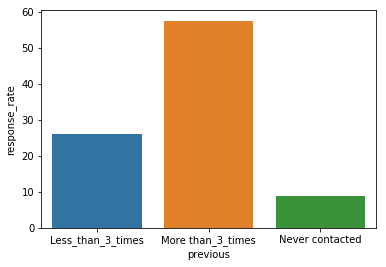

In [125]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

In [126]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'Prospect ID',
       'age_bins'],
      dtype='object')

#### Employment Variation Rate

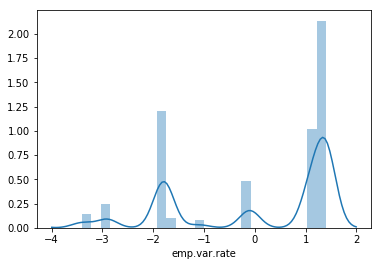

In [127]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [128]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [129]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [130]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

In [131]:
No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

In [132]:
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

In [133]:
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [134]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


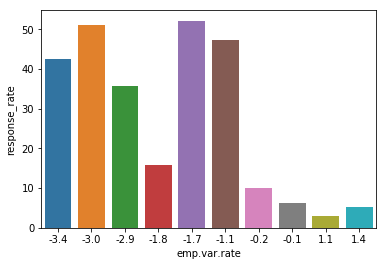

In [135]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

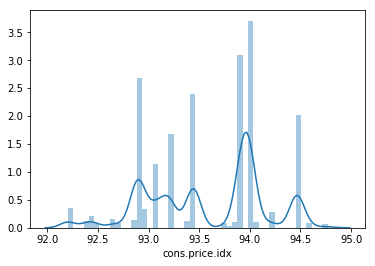

In [136]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [137]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [138]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

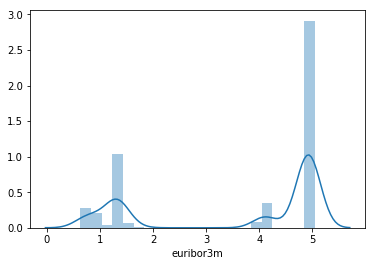

In [139]:
sns.distplot(loan['euribor3m'])
plt.show()

In [140]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

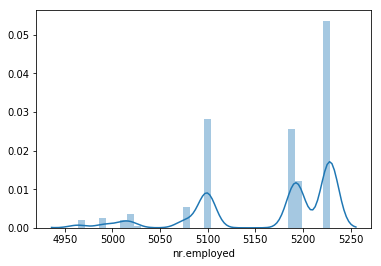

In [141]:
sns.distplot(loan['nr.employed'])
plt.show()

In [142]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [143]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Now that we have completed basic exploratory analysis, we can move to the next stage, that is data cleaning and data preparation

#### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [144]:
# inspect the columns

loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'Prospect ID',
       'age_bins'],
      dtype='object')

In [145]:
# Droping the column age_bins we had created for the purpose of data visualisation
# Also dropping duration since the call has not been made yet.

loan.drop(columns = ['age_bins','duration'], inplace = True)

In [146]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

In [147]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [148]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [149]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [150]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [151]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [152]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [153]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [154]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [155]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [156]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [157]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [158]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [159]:
# inspect the dataframe

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [160]:
# Drop all features for whom dummy variable has been created

loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [161]:
loan.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,Prospect ID,job_blue-collar,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,...,1,0,0,0,0,1,0,1,1,0
2,37,1,1.1,93.994,-36.4,4.857,5191.0,0,2,0,...,1,0,0,0,0,1,0,1,1,0
3,40,1,1.1,93.994,-36.4,4.857,5191.0,0,3,0,...,1,0,0,0,0,1,0,1,1,0
4,56,1,1.1,93.994,-36.4,4.857,5191.0,0,4,0,...,1,0,0,0,0,1,0,1,1,0


In [162]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [228]:
# Putting feature variable to X
X = loan.drop(['response'],axis=1)

# Putting response variable to y
y = loan[['response','Prospect ID']]

In [229]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [230]:
X_train_copy = X_train
X_test_copy = X_test
y_train_copy = y_train
y_test_copy = y_test
X_train.drop ('Prospect ID', axis = 1, inplace = True)
X_test.drop ('Prospect ID', axis = 1, inplace = True)
y_train.drop ('Prospect ID', axis = 1, inplace = True)
y_test.drop ('Prospect ID', axis = 1, inplace = True)

#### Standardisation

In [177]:
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
7019,31,4,1.1,93.994,-36.4,4.860,5191.0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,51,3,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,39,3,1.4,93.918,-42.7,4.960,5228.1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,68,4,-1.1,94.601,-49.5,1.000,4963.6,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,37,3,1.4,94.465,-41.8,4.864,5228.1,0,0,0,...,0,0,1,0,0,1,0,1,1,0


In [178]:
# Standardisation continuous features for X_train
X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [179]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [180]:
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [181]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [182]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [183]:
# Standardisation continuous features for X_train
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [184]:
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

In [185]:
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [186]:
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [187]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-1.182984,-0.651460,-1.199007,-1.172918,-1.237193,-1.348603,-0.944859
27585,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0.100062,0.663413,-0.118526,-0.644728,-0.332420,0.226981,0.393573
15722,1,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.590809,-0.651460,0.834840,0.590583,-0.483215,0.768913,0.840640
40349,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.182984,-0.213169,-1.135450,0.778116,0.464642,-1.574841,-2.432774
2576,0,0,0,0,0,0,1,0,0,0,...,1,1,0,1.481803,-0.213169,0.644167,0.721340,0.873944,0.708890,0.327136


In [188]:
import statsmodels.api as sm

### Modelling

Now that the data preparation step is complete, we will jump straight into modelling
We will look at three different models

- Logistic Regression
- Decision Tree
- Random Forests

#### Logistic Regression

In [189]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [190]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28782
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7933.3
Date:                Tue, 23 Jul 2019   Deviance:                       15867.
Time:                        01:27:34   Pearson chi2:                 2.92e+04
No. Iterations:                    19   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6435      0.284     -5.777      0.000      -2.201      -1.086
job_blue-collar                    -0.1547      0.083     -1.873      0.061      -0.317       0.007
job_entrepreneur                   -0.2347      0.132     -1.776      0.076      -0.494       0.024
job_housemaid                       0.0296      0.148      0.201      0.841      -0.260       0.319
job_management                     -0.1551      0.092     -1.690      0.091      -0.335       0.025
job_retired                         0.2281      0.110      2.071      0.038       0.012       0.444
job_self-employed                  -0.0586      0.121     -0.483      0.629      -0.297       0.179
job_services                       -0.0573      0.088     -0.649      0.516      -0.230       0.116
job_student                         0.2777      0.120      2.324      0.020       0.043       0.512
job_technician                     -0.0158      0.075     -0.211      0.833      -0.162       0.131
job_unemployed                     -0.0249      0.134     -0.186      0.853      -0.288       0.238
job_unknown                        -0.0977      0.241     -0.406      0.685      -0.569       0.374
marital_married                     0.0546      0.072      0.761      0.446      -0.086       0.195
marital_single                      0.1182      0.082      1.444      0.149      -0.042       0.279
education_Secondary_Education       0.0322      0.072      0.447      0.655      -0.109       0.174
education_Tertiary_Education        0.1214      0.073      1.663      0.096      -0.022       0.265
education_professional.course       0.0775      0.086      0.902      0.367      -0.091       0.246
education_unknown                   0.1810      0.109      1.663      0.096      -0.032       0.394
default_unknown                    -0.2785      0.070     -4.003      0.000      -0.415      -0.142
default_yes                       -17.5533   1.25e+04     -0.001      0.999   -2.45e+04    2.45e+04
housing_unknown                    -0.0493      0.071     -0.693      0.489      -0.189       0.090
housing_yes                        -0.0349      0.043     -0.809      0.419      -0.120       0.050
loan_unknown                       -0.0493      0.071     -0.693      0.489      -0.189       0.090
loan_yes                            0.0121      0.059      0.203      0.839      -0.104       0.128
contact_telephone                  -0.6338      0.079     -8.055      0.000      -0.788      -0.480
month_aug                           0.4285      0.128      3.346      0.001       0.178       0.679
month_dec                           0.2895      0.226      1.282      0.200      -0.153       0.732
month_jul                          -0.0148      0.100     -0.148      0.882      -0.211       0.181
month_jun                          -0.6888      0.132     -5.2

In [192]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### Principal Component Analysis

In [193]:
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [194]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      32.80
1      43.59
2      52.43
3      60.59
4      66.34
5      69.65
6      72.24
7      74.59
8      76.82
9      78.77
10     80.65
11     82.50
12     84.31
13     86.07
14     87.70
15     89.18
16     90.44
17     91.58
18     92.63
19     93.37
20     94.08
21     94.67
22     95.19
23     95.70
24     96.16
25     96.57
26     96.96
27     97.36
28     97.70
29     98.01
30     98.30
31     98.57
32     98.82
33     99.04
34     99.21
35     99.37
36     99.51
37     99.63
38     99.74
39     99.80
40     99.86
41     99.89
42     99.93
43     99.95
44     99.97
45     99.99
46    100.00
47    100.00
48    100.00
49    100.00
dtype: float64


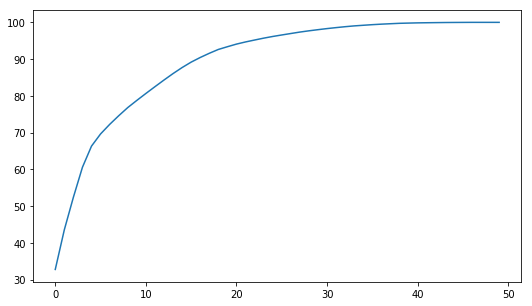

In [195]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [196]:
# create pipeline
PCA_VARS = 16
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [197]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8157885609240054

In [198]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[9150 1825]
 [ 535  847]]
Sensitivity: 	0.61
Specificity: 	0.83
AUC:    	 0.78


In [200]:
# class imbalance
y_train.value_counts()/y_train.shape

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [201]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [16,17,18,19,20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [202]:
# fit model
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=Tr...
                                                           multi_class='warn',
                    

In [203]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.78467956969778
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 18}


In [204]:
# create pipeline
steps = [("pca", PCA(n_components=18)),
         ("logistic", LogisticRegression(class_weight='balanced', C = 10.0, penalty = 'l2'))]

# compile pipeline
pca_logistic = Pipeline(steps)


In [205]:
# fit model
pca_logistic.fit(X_train, y_train)

# check score on train data
pca_logistic.score(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8159273004751829

In [206]:
# predict churn on test data
y_pred = pca_logistic.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pca_logistic.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[9150 1825]
 [ 537  845]]
Sensitivity: 	0.61
Specificity: 	0.83
AUC:    	 0.78


In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.89     10975
           1       0.32      0.61      0.42      1382

    accuracy                           0.81     12357
   macro avg       0.63      0.72      0.65     12357
weighted avg       0.87      0.81      0.83     12357



####  Decision Tree Classifier

In [442]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [443]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10975
           1       0.65      0.28      0.39      1382

    accuracy                           0.90     12357
   macro avg       0.78      0.63      0.67     12357
weighted avg       0.89      0.90      0.88     12357



In [444]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred_default))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[10773   202]
 [ 1001   381]]
Sensitivity: 	0.61
Specificity: 	0.83


Now we will try to tune the hyperparameters

- Maximum Depth
- Minimum Samples Leaf
- Minimum Samples Split
- Criterion

We will use gridsearchCV to tune the hyperparameters

In [445]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   12.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [446]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.124993,0.027954,0.012497,0.006248,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.898387,0.897694,0.896827,0.898005,0.900781,0.898339,0.001325,15
1,0.134962,0.033511,0.007033,0.006675,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.898387,0.897694,0.896827,0.898005,0.900781,0.898339,0.001325,15
2,0.115618,0.021192,0.006249,0.007654,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.898908,0.899428,0.897520,0.898873,0.901648,0.899275,0.001344,5
3,0.115617,0.023382,0.006922,0.008545,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.898908,0.899428,0.897520,0.898873,0.901648,0.899275,0.001344,5
4,0.177697,0.029092,0.006797,0.000400,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.899081,0.896827,0.900988,0.895056,0.900434,0.898477,0.002233,11
5,0.184494,0.034660,0.007600,0.000493,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.899081,0.896827,0.900988,0.895056,0.900434,0.898477,0.002233,11
6,0.175498,0.036550,0.007997,0.001095,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.900988,0.900988,0.899081,0.897832,0.901648,0.900108,0.001425,1
7,0.180696,0.034069,0.007601,0.001497,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.900988,0.900988,0.899081,0.897832,0.901648,0.900108,0.001425,1
8,0.098944,0.011148,0.006999,0.000007,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.898387,0.897694,0.896653,0.898873,0.900781,0.898477,0.001372,11
9,0.112334,0.018778,0.007797,0.001468,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.898387,0.897694,0.896653,0.898873,0.900781,0.898477,0.001372,11


In [447]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9001075231521626
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Now we will create a model with the parameters found with best accuracy

- min_samples_leaf = 50
- min-Samples_aplit = 50
- max_depth = 5
- criterion = gini

In [448]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [449]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8994092417253379

In [450]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [451]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

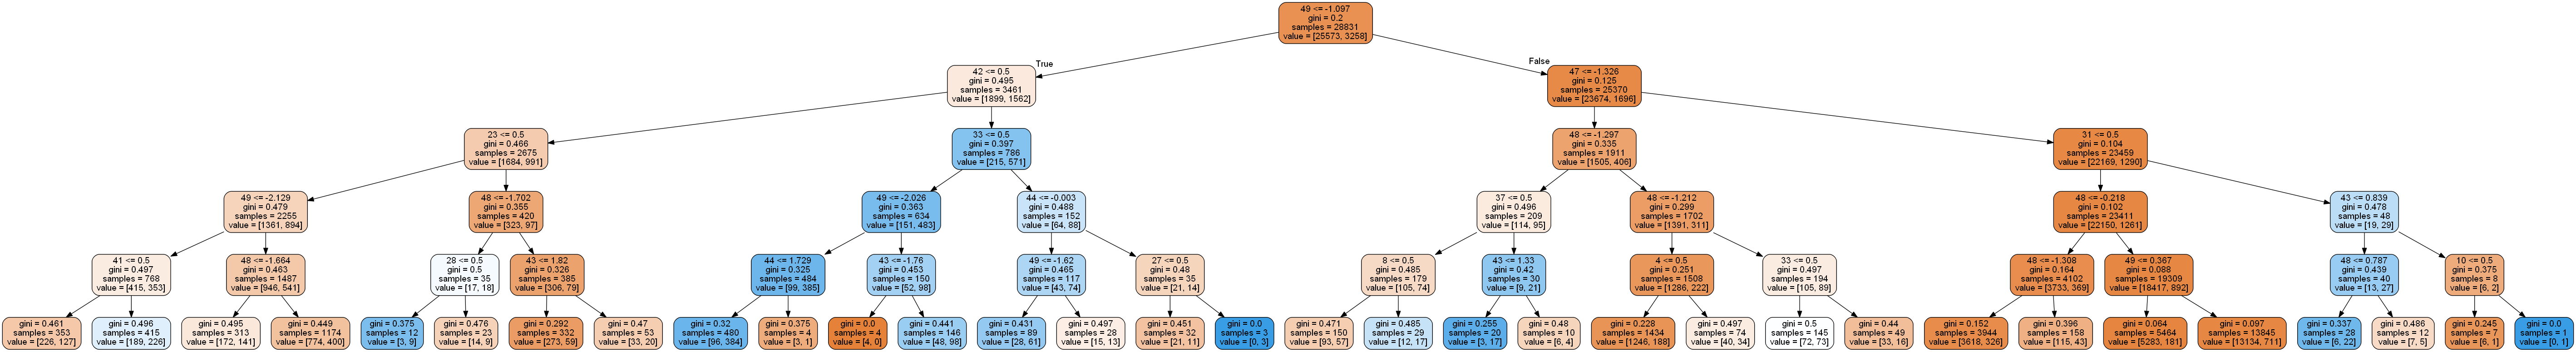

In [452]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [453]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8990855385611395


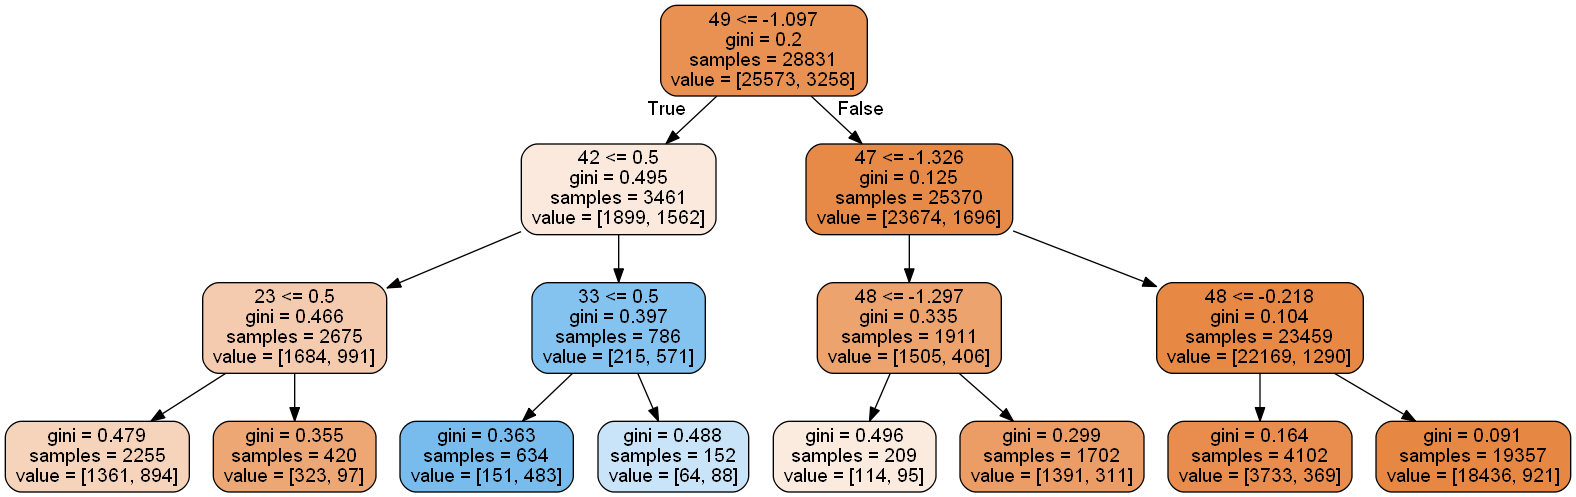

In [454]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [455]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10975
           1       0.70      0.17      0.27      1382

    accuracy                           0.90     12357
   macro avg       0.80      0.58      0.61     12357
weighted avg       0.88      0.90      0.87     12357



In [456]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[10877    98]
 [ 1149   233]]


In [457]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.17
Specificity: 	0.99


Now that we have looked at Logistic Regression and Decision trees, we will look at Ensemble model that is Random Forest

#### Random Forest

In [458]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [459]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [460]:
# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [461]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.7846779528473455
Best hyperparameters:  {'logistic__C': 5, 'logistic__penalty': 'l2', 'pca__n_components': 18}


In [462]:
# predict churn on test data
y_pred = rfc.predict(X_test)

In [463]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10975
           1       0.56      0.28      0.37      1382

    accuracy                           0.89     12357
   macro avg       0.73      0.62      0.66     12357
weighted avg       0.87      0.89      0.88     12357



In [464]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[10669   306]
 [ 1000   382]]


In [465]:
print(accuracy_score(y_test,y_pred))

0.8943109168892126


Once again, we are going to tune the hyperparameters

- Number of trees (estimators)
- Maximum Depth
- Minimum Samples leaf
- Minimum Samples Split
- Maximum features

In [466]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [467]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  5.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [468]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8997953591620131 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 200}


In [469]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             max_features=10,
                             n_estimators=100)

In [470]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=400,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [471]:
# predict
predictions = rfc.predict(X_test)

In [472]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10975
           1       0.70      0.18      0.29      1382

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [473]:
print(confusion_matrix(y_test,predictions))

[[10867   108]
 [ 1133   249]]


In [474]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, predictions, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.18
Specificity: 	0.99


In [208]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])

In [209]:
decile_df = pd.concat([pd.DataFrame(y_test).reset_index(), pred_prob], ignore_index=True,axis=1)

In [210]:
decile_df.drop(0, inplace=True, axis = 1)

In [211]:
decile_df.rename({1:'actual', 2:'pred_prob'}, axis=1, inplace=True)
decile_df

,actual,pred_prob
0,0,0.510242
1,0,0.337163
2,0,0.295608
3,1,0.931876
4,0,0.203797
5,1,0.476647
6,0,0.353707
7,0,0.173237
8,0,0.363405
9,0,0.307781


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [212]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [213]:
fpr, tpr, thresholds = metrics.roc_curve( decile_df.actual, decile_df.pred_prob, drop_intermediate = False )

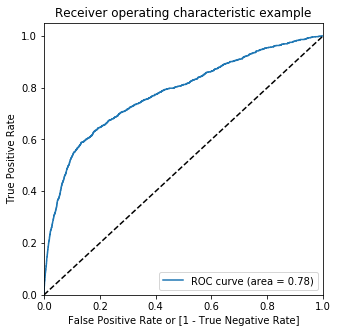

In [214]:
draw_roc(decile_df.actual, decile_df.pred_prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [215]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    decile_df[i]= decile_df.pred_prob.map(lambda x: 1 if x > i else 0)
decile_df.head()

,actual,pred_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.510242,1,1,1,1,1,1,0,0,0,0
1,0,0.337163,1,1,1,1,0,0,0,0,0,0
2,0,0.295608,1,1,1,0,0,0,0,0,0,0
3,1,0.931876,1,1,1,1,1,1,1,1,1,1
4,0,0.203797,1,1,1,0,0,0,0,0,0,0


In [216]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(decile_df.actual,decile_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.111839  1.000000  0.000000
0.1   0.1  0.112001  1.000000  0.000182
0.2   0.2  0.210569  0.975398  0.114260
0.3   0.3  0.467185  0.858900  0.417859
0.4   0.4  0.722991  0.703329  0.725467
0.5   0.5  0.808853  0.611433  0.833713
0.6   0.6  0.842680  0.569465  0.877084
0.7   0.7  0.870357  0.481910  0.919271
0.8   0.8  0.880958  0.392909  0.942415
0.9   0.9  0.895768  0.185239  0.985239


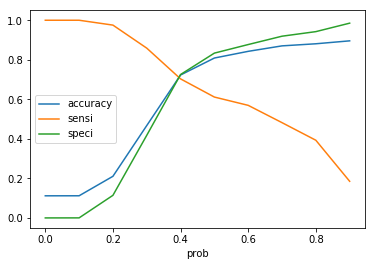

In [217]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [218]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])

In [233]:
pred_prob['Prospect ID'] = y_test_copy.index

In [240]:
decile_df = pd.concat([pd.DataFrame(y_test).reset_index(), pred_prob], ignore_index=True,axis=1)

In [241]:
#decile_df = pd.concat([pd.DataFrame(decile_df), loan['Prospect ID']], ignore_index=False, axis = 1)

In [242]:
decile_df.drop(0, inplace=True, axis = 1)

In [243]:
decile_df.rename({1:'actual', 2:'pred_prob', 3:'Prospect ID'}, axis=1, inplace=True)

In [244]:
decile_df['predicted'] = decile_df.pred_prob.map( lambda x: 1 if x > 0.4 else 0)

In [263]:
decile_df = pd.merge(decile_df,pd.DataFrame(loan_copy[['duration','Prospect ID']]), how = 'inner',on = 'Prospect ID')
decile_df
#loan_copy['duration']

,actual,pred_prob,Prospect ID,predicted,duration
0,0,0.510242,33148,1,52
1,0,0.337163,27585,0,407
2,0,0.295608,15722,0,177
3,1,0.931876,40349,1,187
4,0,0.203797,2576,0,165
5,1,0.476647,33359,1,725
6,0,0.353707,26890,0,75
7,0,0.173237,8032,0,29
8,0,0.363405,13180,0,272
9,0,0.307781,10102,0,139


In [264]:
decile_df['cost'] = (decile_df['duration']/60)*1.0
decile_df

,actual,pred_prob,Prospect ID,predicted,duration,cost
0,0,0.510242,33148,1,52,0.866667
1,0,0.337163,27585,0,407,6.783333
2,0,0.295608,15722,0,177,2.950000
3,1,0.931876,40349,1,187,3.116667
4,0,0.203797,2576,0,165,2.750000
5,1,0.476647,33359,1,725,12.083333
6,0,0.353707,26890,0,75,1.250000
7,0,0.173237,8032,0,29,0.483333
8,0,0.363405,13180,0,272,4.533333
9,0,0.307781,10102,0,139,2.316667


In [265]:
# create onfusion matrix
cm = confusion_matrix(decile_df.actual, decile_df.predicted)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(decile_df.actual, decile_df.predicted, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
print("AUC:    \t", round(roc_auc_score(decile_df.actual, decile_df.predicted),2))

[[7962 3013]
 [ 410  972]]
Sensitivity: 	0.7
Specificity: 	0.73
AUC:    	 0.71


In [266]:
from sklearn.metrics import classification_report
print(classification_report(decile_df.actual, decile_df.predicted))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82     10975
           1       0.24      0.70      0.36      1382

    accuracy                           0.72     12357
   macro avg       0.60      0.71      0.59     12357
weighted avg       0.87      0.72      0.77     12357



In [267]:
decile_df

,actual,pred_prob,Prospect ID,predicted,duration,cost
0,0,0.510242,33148,1,52,0.866667
1,0,0.337163,27585,0,407,6.783333
2,0,0.295608,15722,0,177,2.950000
3,1,0.931876,40349,1,187,3.116667
4,0,0.203797,2576,0,165,2.750000
5,1,0.476647,33359,1,725,12.083333
6,0,0.353707,26890,0,75,1.250000
7,0,0.173237,8032,0,29,0.483333
8,0,0.363405,13180,0,272,4.533333
9,0,0.307781,10102,0,139,2.316667


In [293]:
# Average call duration
decile_df['duration'].mean()

255.61633082463382

In [269]:
decile_df['decile'] = pd.qcut(decile_df['pred_prob'], 10, labels=np.arange(10, 0, -1))

In [270]:
lift_df = decile_df.groupby('decile')['pred_prob'].count().reset_index()

In [271]:
lift_df.rename({'pred_prob':'total'}, axis=1, inplace=True)

In [272]:
lift_df_pred = decile_df[decile_df['actual']==1].groupby('decile')['actual'].count().reset_index()

In [280]:
lift_df_cost = decile_df.groupby('decile')['cost'].sum().reset_index()

In [273]:
lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 570.0 bytes


In [274]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

In [281]:
lift_df_final = lift_df_final.merge(lift_df_cost, on = 'decile')

In [282]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

In [283]:
lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()

In [287]:
lift_df_final['cumcost'] = lift_df_final['cost'].cumsum()

In [288]:
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))

In [289]:
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [290]:
lift_df_final

,decile,total,actual,cumresp,gain,cumlift,cost,cumcost
0,1,1236,569,569,41.172214,4.117221,6074.000000,6074.000000
1,2,1236,259,828,59.913169,2.995658,5437.800000,11511.800000
2,3,1235,117,945,68.379161,2.279305,5323.900000,16835.700000
3,4,1236,92,1037,75.036179,1.875904,5329.250000,22164.950000
4,5,1235,66,1103,79.811867,1.596237,5133.233333,27298.183333
5,6,1236,68,1171,84.732272,1.412205,4849.916667,32148.100000
6,7,1236,75,1246,90.159190,1.287988,5235.200000,37383.300000
7,8,1235,64,1310,94.790159,1.184877,4951.416667,42334.716667
8,9,1236,39,1349,97.612156,1.084580,5211.283333,47546.000000
9,10,1236,33,1382,100.000000,1.000000,5098.183333,52644.183333


Note that you can attain 80% of total conversions by targeting only 50% of the total client base. This can be used in cost optimization and depending on the cost per call, we can determine, how many people should be part of the tele marketing campaign

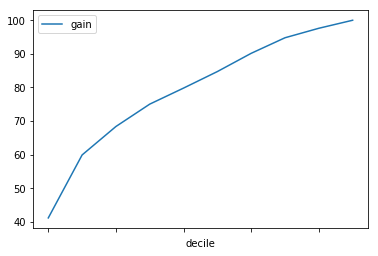

In [291]:
lift_df_final.plot.line(x='decile', y=['gain'])

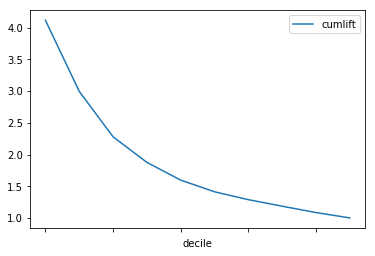

In [292]:
lift_df_final.plot.line(x='decile', y=['cumlift'])